# Final assignment - Heart dataset - Group 2 - Alessandro, Fadi & Timon

**Context:**

<sub>
Cardiovascular diseases (CVDs) are the leading cause of death globally, accounting for an estimated 17.9 million lives each year (31% of all deaths). Four out of 5 CVD deaths result from heart attacks and strokes, with one-third occurring prematurely in individuals under 70 years old. Heart failure is a common event caused by CVDs, and this dataset comprises 11 features for predicting potential heart disease. Early detection and management are crucial for people with cardiovascular disease or those at high cardiovascular risk (due to risk factors such as hypertension, diabetes, hyperlipidemia, or established disease), where a machine learning model can be invaluable.
</sub>

**Goal:**

<sub>To predict the likelihood of heart failure based on the "Heart Failure Prediction" dataset. The output will be a binary classification (0 or 1) representing the likelihood of heart failure.</sub>

**Features (x):**

<sub>The features to be used are as follows: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina,	Oldpeak	ST_Slope & HeartDisease.</sub>

**Target Variable (y):**

<sub>The target variable is "HeartDisease."</sub>

**Attribute Information:**

<sub>

- Age: Age of the patient [years]
- Sex: Sex of the patient [M: Male, F: Female]
- ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: Resting blood pressure [mm Hg]
- Cholesterol: Serum cholesterol [mm/dl]
- FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
- Oldpeak: Oldpeak = ST [Numeric value measured in depression]
- ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: Output class [1: heart disease, 0: Normal]

</sub>

--- Start of Timon's part ---

## Step 1 - Data Loading and Initial Exploration:
<sub>

- Load the dataset into a Pandas DataFrame.
- Display basic information about the dataset.

</sub>

In [1]:
# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assign & print the dataset.
dataset = 'data/modified_heart_dataset_supervised.csv'
df = pd.read_csv(dataset)
df

# Within the dataset, we can make the following divide:

# Numerical columns:
# - Age
# - RestingBP
# - Cholesterol
# - FastingBS
# - MaxHR
# - ExerciseAngina
# - Oldpeak
# - GeneticMarker1
# - GeneticMarker2

# Categorical columns:
# - Sex
# - ChestPainType
# - RestingECG
# - ST_Slope
# - BodyWeightCategory
# - HeartDisease

# All the columns are features (x) except for the last one, which is the target variable (y).

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [2]:
# Explore the distribution of the HeartDisease column, which is the target variable.

# Print the number of people with heart disease and without heart disease.
print(df['HeartDisease'].value_counts())

# The amount of people with and without heart disease is almost equal. 
# This is good as it means the dataset is balanced.

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [3]:
# Display basic information about the dataset and check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

## Step 2 - Data Preparation

<sub>

- Identify and handle missing values.

</sub>

In [4]:
# Secondary check for missing values.
missing_values = df.isnull().sum()
print(missing_values)

# No missing values found, proceed to the next step.

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
GeneticMarker1        0
GeneticMarker2        0
BodyWeightCategory    0
HeartDisease          0
dtype: int64


In [5]:
# Check for duplicate values.
duplicate_values = df.duplicated().sum()
print(duplicate_values)

# No duplicate values found, proceed to the next step.

0


## Step 3 - Exploratory Data Analysis (EDA)

<sub>

- Create visualizations to explore the relationships between the features and the target variable.
- Analyze the distribution of the target variable.

</sub>

In [6]:
# Display the summary statistics.
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.239651   198.787582    0.233115  136.643791   
std      9.432617   18.804257   109.529397    0.423046   25.662700   
min     28.000000    1.000000    -5.000000    0.000000   56.000000   
25%     47.000000  120.000000   173.000000    0.000000  118.000000   
50%     54.000000  131.000000   223.000000    0.000000  137.000000   
75%     60.000000  143.000000   267.000000    0.000000  156.000000   
max     77.000000  201.000000   607.000000    1.000000  201.000000   

          Oldpeak  GeneticMarker1  GeneticMarker2  HeartDisease  
count  918.000000      918.000000      918.000000    918.000000  
mean     0.887364        0.508888    10540.282135      0.553377  
std      1.066570        0.291353     6242.988493      0.497414  
min     -2.600000        0.000188     -365.000000      0.000000  
25%      0.000000        0.254569     7

### Numerical columns

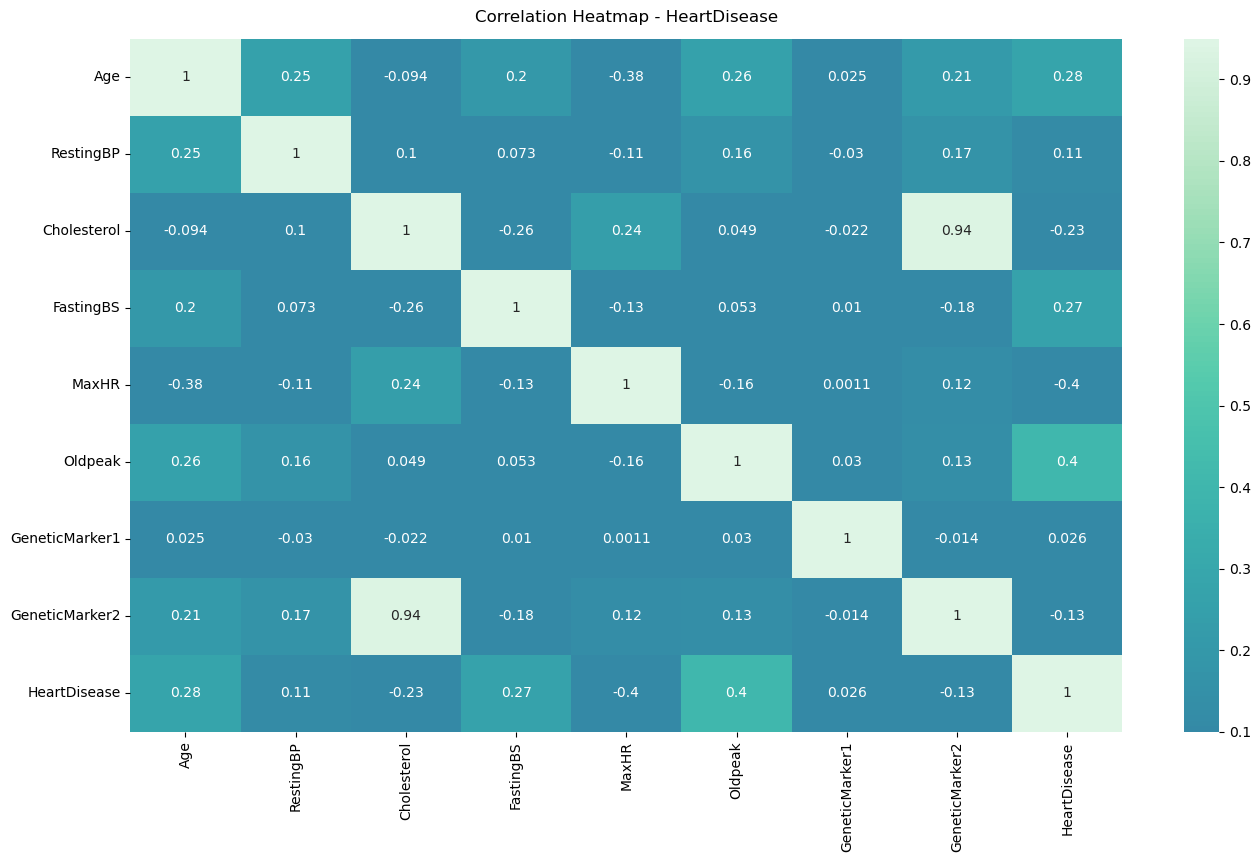

In [7]:
# Check out the correlation between the columns in the dataset using a heatmap.

# Set up the figure size.
plt.figure(figsize=(16, 9))

# Calculate the correlation matrix using all numerical columns.
cor = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
           'GeneticMarker1', 'GeneticMarker2', 'HeartDisease']].corr()

# Create a heatmap with correlation values annotated.
heatmap = sns.heatmap(data=cor, annot=True, vmin=0.1, vmax=0.95, center=0, cmap='mako')

# Set the title and adjust the padding.
heatmap.set_title('Correlation Heatmap - HeartDisease', fontdict={'fontsize': 12}, pad=12)

# Show the heatmap.
plt.show()

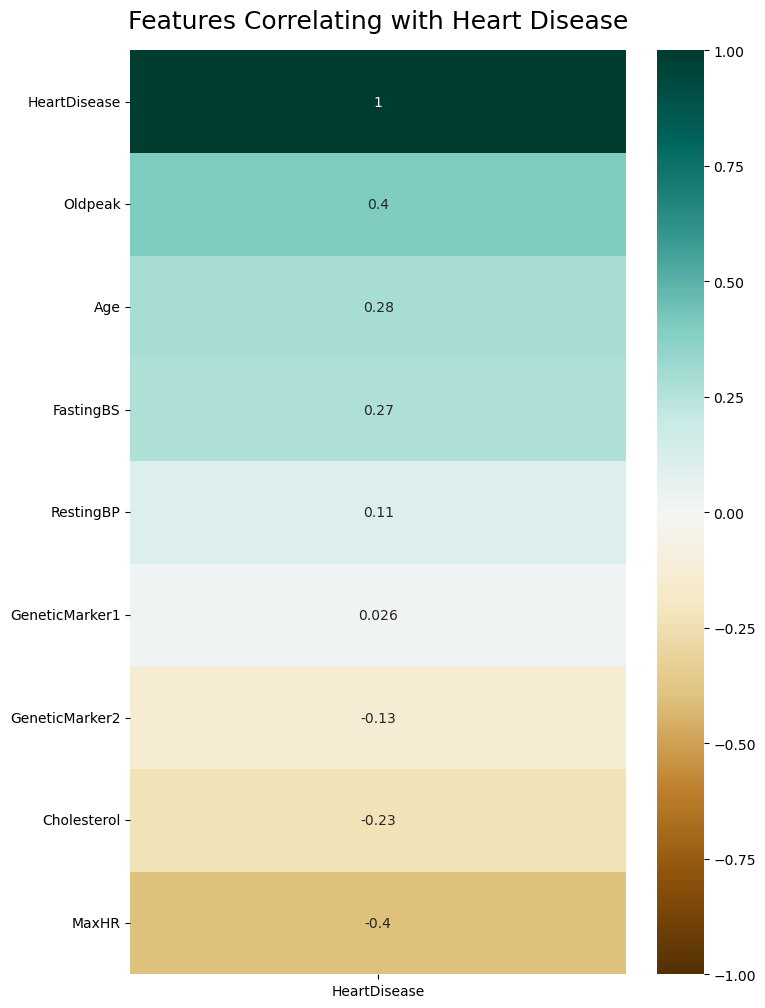

In [8]:
# Analyzing the correlation between the target variable HeartDisease and the different features.
# The focus is on understanding the correlation of HeartDisease with eligible features.

# Creating a heatmap to visualize correlation.
plt.figure(figsize=(8, 12))

# Calculating the correlation matrix using all numerical columns.
cor = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'GeneticMarker1', 'GeneticMarker2', 'HeartDisease']].corr()

# Sorting and extracting correlation with HeartDisease in descending order.
heatmap = sns.heatmap(data=cor[['HeartDisease']].sort_values(by='HeartDisease', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Setting the title and formatting for better readability.
heatmap.set_title('Features Correlating with Heart Disease', fontdict={'fontsize': 18}, pad=16)

# Displaying the heatmap.
plt.show()

# General guide for interpreting correlation values:

# Correlation Interpretation Guide:
# Perfect Negative Correlation: -1.0
# Very Strong Negative Correlation: -0.9 to -1.0
# Strong Negative Correlation: -0.7 to -0.9
# Moderate Negative Correlation: -0.5 to -0.7
# Weak Negative Correlation: -0.3 to -0.5
# Very Weak Negative Correlation: -0.1 to -0.3

# No Correlation: 0.0

# Very Weak Positive Correlation: 0.1 to 0.3
# Weak Positive Correlation: 0.3 to 0.5
# Moderate Positive Correlation: 0.5 to 0.7
# Strong Positive Correlation: 0.7 to 0.9
# Very Strong Positive Correlation: 0.9 to 1.0
# Perfect Positive Correlation: 1.0

# Conclusion:

# There seems to be no correlation between HeartDisease and GeneticMarker1.
# There seems to be a very weak positive correlation between HeartDisease and Cholesterol.
# There seems to be a weak negative correlation between HeartDisease and MaxHR.

In [9]:
# Variable assignments.

# Set the number of bins for the histograms below.
bins = 20

#### Cholesterol

In [10]:
# Fadi and Alex raised concerns about the Cholesterol column. Seems to have a rather high amount of 0 values. 

# Doing a check here.
zero_cholesterol_count = (df['Cholesterol'] == 0).sum()
print(f"The number of patients with a cholesterol value of 0 is {zero_cholesterol_count}.")
# Amount of 0 values for the cholesterol column seems to be too high. Will need to be explored further.
print(f"The correlation between Heart Disease and Cholesterol is {df['HeartDisease'].corr(df['Cholesterol'])}")
# As we've noted before, there is currently a very weak negative correlation between HeartDisease and Cholesterol.

The number of patients with a cholesterol value of 0 is 14.
The correlation between Heart Disease and Cholesterol is -0.2328105544159199


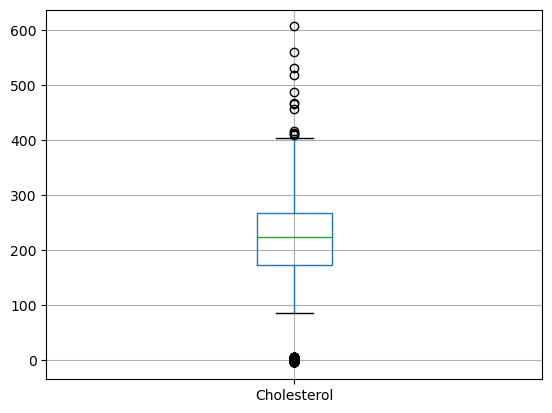

In [11]:
# Create a boxplot for the Cholesterol column.
df.boxplot(column='Cholesterol')
plt.show()
# Looking at the boxplot, there are a lot of outliers. This will need to be addressed in the next step by removing them.

In [12]:
# Calculate the IQR for the Cholesterol column.
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Cholesterol column.
df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

# Display the summary statistics again to check results.
print(df.describe())
# Standard deviation has decreased, indicating that the outliers have been removed.

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  734.000000  734.000000   734.000000  734.000000  734.000000   
mean    52.889646  132.930518   240.807902    0.164850  140.158038   
std      9.494312   17.664659    51.121580    0.371298   24.703858   
min     28.000000   89.000000    86.000000    0.000000   71.000000   
25%     46.000000  121.000000   207.000000    0.000000  122.000000   
50%     54.000000  132.000000   236.000000    0.000000  141.000000   
75%     59.000000  143.000000   274.750000    0.000000  159.000000   
max     77.000000  196.000000   403.000000    1.000000  201.000000   

          Oldpeak  GeneticMarker1  GeneticMarker2  HeartDisease  
count  734.000000      734.000000      734.000000    734.000000  
mean     0.900954        0.507698    12774.478202      0.475477  
std      1.071986        0.293573     3699.655971      0.499739  
min     -0.100000        0.000188     3836.000000      0.000000  
25%      0.000000        0.253065    10

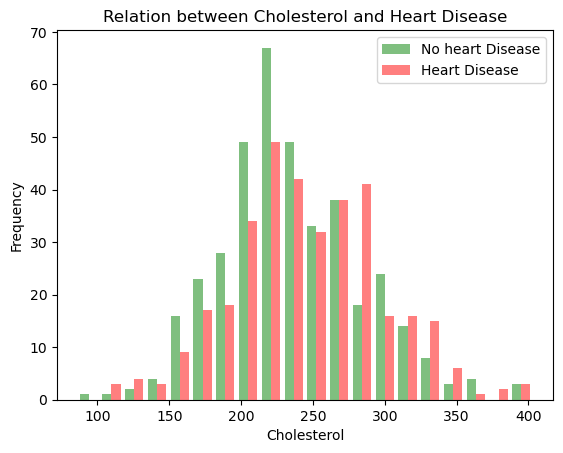

The correlation between Heart Disease and Cholesterol is 0.10034257339553616


In [13]:
# Explore the relation between HeartDisease and Cholesterol.

# Declare variables.
no_heart_disease_cholesterol = df[df['HeartDisease'] == 0]['Cholesterol']
heart_disease_cholesterol = df[df['HeartDisease'] == 1]['Cholesterol']

# Create a histogram.
plt.hist([no_heart_disease_cholesterol, heart_disease_cholesterol], bins=bins, alpha=0.5, label=['No heart Disease', 'Heart Disease'], color=['green', 'red'], histtype='bar')

# Add labels and show the plot.
plt.gca().set(title='Relation between Cholesterol and Heart Disease', xlabel='Cholesterol', ylabel='Frequency')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# There seems to be a relation between cholesterol and heart disease. 
# The lower the cholesterol, the lower the chance of heart disease.

# The correlation between Heart Disease and Cholesterol has also increased after removing the outliers.
print(f"The correlation between Heart Disease and Cholesterol is {df['HeartDisease'].corr(df['Cholesterol'])}")

#### GeneticMarker1

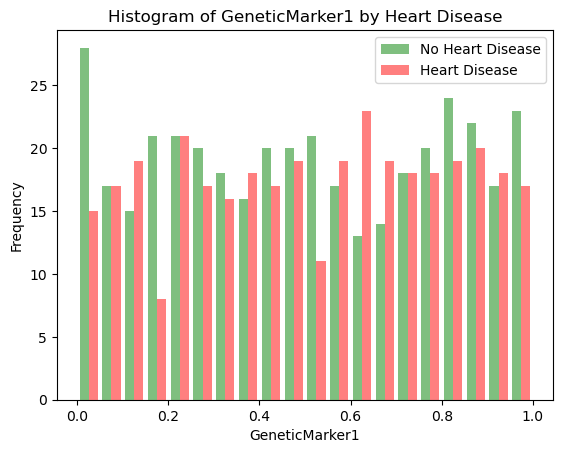

In [14]:
# Explore the relation between HeartDisease and GeneticMarker1.

# Variable assignments.
no_heart_disease_genetic_marker1 = df[df['HeartDisease'] == 0]['GeneticMarker1']
heart_disease_genetic_marker1 = df[df['HeartDisease'] == 1]['GeneticMarker1']

# Create a histogram.
plt.hist([no_heart_disease_genetic_marker1, heart_disease_genetic_marker1], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])
# Add labels and title to the histogram.
plt.gca().set(title='Histogram of GeneticMarker1 by Heart Disease', xlabel='GeneticMarker1', ylabel='Frequency')
# Add legend to the histogram.
plt.legend()
# Show the plot.
plt.show()

# There seems to be no correlation between the genetic marker GeneticMarker1 and HeartDisease.
# whether a person has HeartDisease or not seems to have no effect on the value of GeneticMarker1.
# Therefore the GeneticMarker1 column is eligible to be dropped.

#### GeneticMarker2

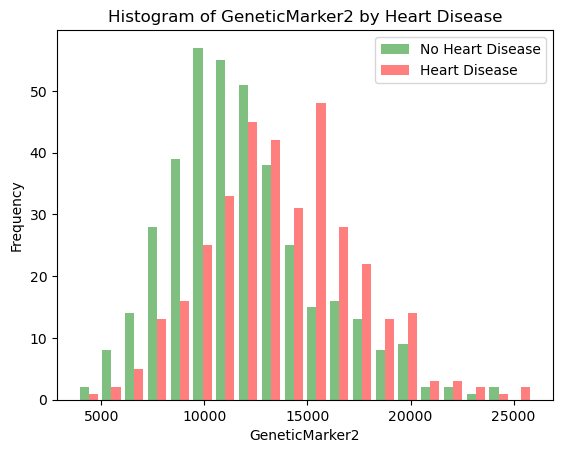

In [15]:
# Explore the relation between HeartDisease and GeneticMarker2.
# GenericMarker1 did not show any correlation with HeartDisease, therefore it might be interesting to check how this compares with GeneticMarker2.

# Variable assignments.
no_heart_disease_genetic_marker2 = df[df['HeartDisease'] == 0]['GeneticMarker2']
heart_disease_genetic_marker2 = df[df['HeartDisease'] == 1]['GeneticMarker2']

# Create a histogram.
plt.hist([no_heart_disease_genetic_marker2, heart_disease_genetic_marker2], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])
# Add labels and title to the histogram.
plt.gca().set(title='Histogram of GeneticMarker2 by Heart Disease', xlabel='GeneticMarker2', ylabel='Frequency')
# Add legend to the histogram.
plt.legend()
# Show the plot.
plt.show()

# There DOES seems to be a correlation between the genetic marker GeneticMarker2 and HeartDisease.
# The higher the value of GeneticMarker2, the more likely a person is to have HeartDisease and vice versa.
# Therefore the GeneticMarker2 column will be kept in.

#### MaxHR

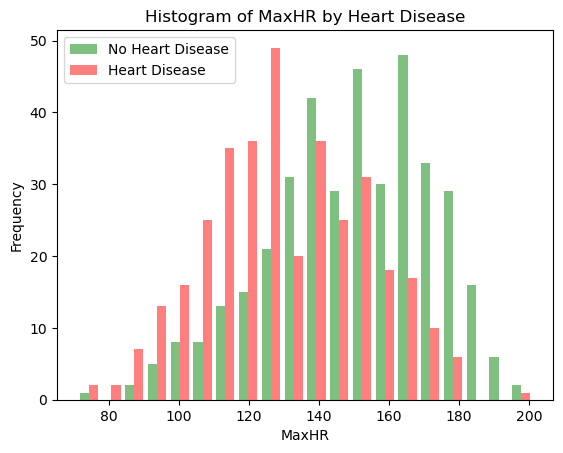

In [16]:
# Explore the relation between HeartDisease and MaxHR.

# Variable assignments.
no_heart_disease_maxhr = df[df['HeartDisease'] == 0]['MaxHR']
heart_disease_maxhr = df[df['HeartDisease'] == 1]['MaxHR']

# Create a histogram.
plt.hist([no_heart_disease_maxhr, heart_disease_maxhr], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])
# Add labels and title to the histogram.
plt.gca().set(title='Histogram of MaxHR by Heart Disease', xlabel='MaxHR', ylabel='Frequency')
# Add legend to the histogram.
plt.legend()
# Show the plot.
plt.show()

# There also seems to be a correlation between the MaxHR and HeartDisease. 
# The higher the value of MaxHR, the less likely a person is to have HeartDisease and vice versa.

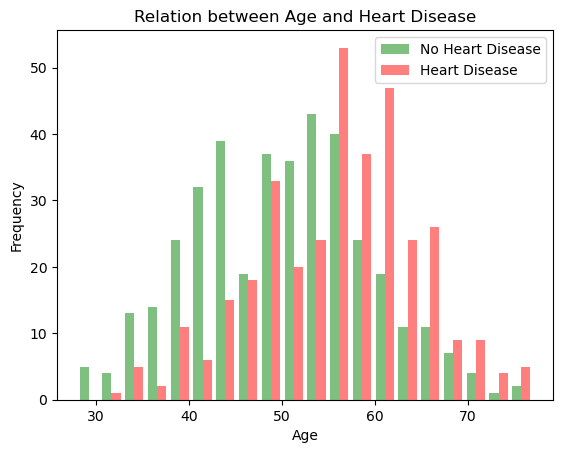

In [17]:
# Explore the relation between the HeartDisease and Age.

# Variable assignments.
heart_disease_age = df[df['HeartDisease'] == 1]['Age']
no_heart_disease_age = df[df['HeartDisease'] == 0]['Age']

# Create a histogram.
plt.hist([no_heart_disease_age, heart_disease_age], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])

# Add labels and title to the histogram.
plt.gca().set( title='Relation between Age and Heart Disease', xlabel='Age', ylabel='Frequency')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# From the looks of it, there seems to also be a relation between Age and HeartDisease. 
# Older people seem to be more prone to HeartDisease.

--- End of Timon's part ---

--- Start of Fadi's part ---

### Categorical columns

#### Sex

Number of male without heart disease: 246
Number of female without heart disease 139
Number of male with heart disease 311
Number of female with heart disease 38


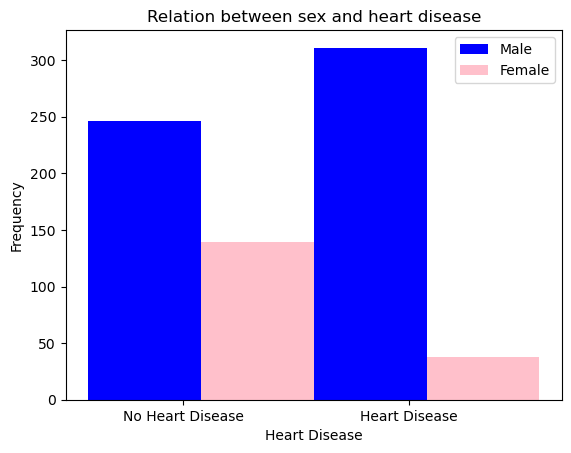

Number of males: 557
Number of females: 177


In [18]:
# Explore the relation between HeartDisease and Sex.

# Filter the dataframe for HeartDisease cases and non-HeartDisease disease cases for males and females.
male_heart_disease = df[(df['HeartDisease'] == 1) & (df['Sex'] == 'M')]
male_no_heart_disease = df[(df['HeartDisease'] == 0) & (df['Sex'] == 'M')]
female_heart_disease = df[(df['HeartDisease'] == 1) & (df['Sex'] == 'F')]
female_no_heart_disease = df[(df['HeartDisease'] == 0) & (df['Sex'] == 'F')]

# Set the number of categories and the width of each bar.
categories = ['No Heart Disease', 'Heart Disease']
bar_width = 0.5

# Set the x-axis positions for the bars.
male_positions = [0, 1]
female_positions = [x + bar_width for x in male_positions]

# Set the heights of the bars.
male_heights = [len(male_no_heart_disease), len(male_heart_disease)]
female_heights = [len(female_no_heart_disease), len(female_heart_disease)] 

# Create the bar plot.
plt.bar(male_positions, male_heights, bar_width, label='Male', color='blue')
plt.bar(female_positions, female_heights, bar_width, label='Female', color='pink')

# Add labels and title to the plot.
plt.gca().set(title='Relation between sex and heart disease', xlabel='Heart Disease', ylabel='Frequency')

# Add x-axis tick labels.
plt.xticks([0.17, 1.17], categories)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# There seems to be a very strong relation between sex and heart disease.
# Check the amount of males vs females.
print("Number of males:", len(df[df['Sex'] == 'M']))
print("Number of females:", len(df[df['Sex'] == 'F']))
# There are far more males than females. 
# This means we should start looking at relative numbers instead.

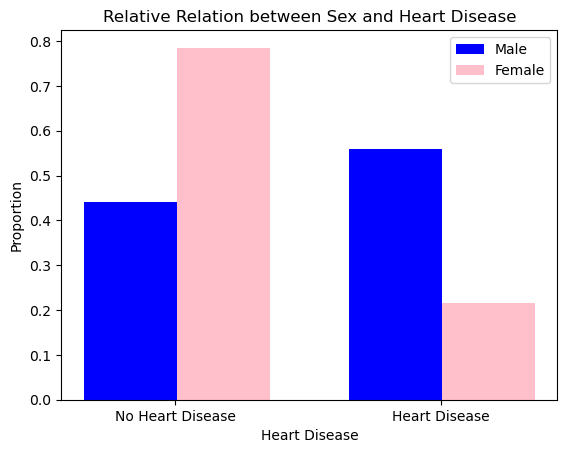

In [19]:
# Calculate the total number of males and females.
total_males = len(df[df['Sex'] == 'M'])
total_females = len(df[df['Sex'] == 'F'])

# Variable assignments.
male_heart_disease_prop = len(df[(df['HeartDisease'] == 1) & (df['Sex'] == 'M')]) / total_males
female_heart_disease_prop = len(df[(df['HeartDisease'] == 1) & (df['Sex'] == 'F')]) / total_females

# Set the number of categories and the width of each bar.
categories = ['No Heart Disease', 'Heart Disease']
bar_width = 0.35

# Set the x-axis positions for the bars.
male_positions = [0, 1]
female_positions = [x + bar_width for x in male_positions]

# Set the heights of the bars to the proportions instead of the absolute numbers.
male_heights = [1 - male_heart_disease_prop, male_heart_disease_prop]
female_heights = [1 - female_heart_disease_prop, female_heart_disease_prop]

# Create the bar plot.
plt.bar(male_positions, male_heights, bar_width, label='Male', color='blue')
plt.bar(female_positions, female_heights, bar_width, label='Female', color='pink')

# Add labels and title to the plot.
plt.gca().set(title='Relative Relation between Sex and Heart Disease', xlabel='Heart Disease', ylabel='Proportion')

# Add x-axis tick labels.
plt.xticks([0.17, 1.17], categories)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# After calculating the relative numbers, it is clear that there is indeed a strong relation between sex 
# and heart disease. Males are more prone to heart disease than females.

#### ChestPainType

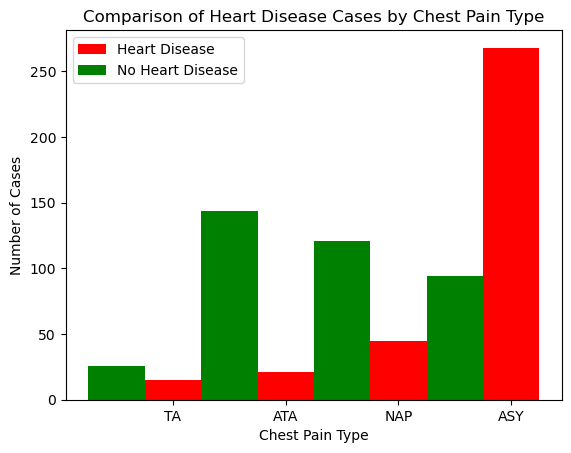

In [20]:
# Explore the relation between HeartDisease and ChestPainType.

#Define ChestPainType categories.
cp_types=['TA', 'ATA', 'NAP', 'ASY']

# Variable assignments.
heart_disease_cpt = df[df['HeartDisease'] == 1]['ChestPainType']
no_heart_disease_cpt = df[df['HeartDisease'] == 0]['ChestPainType']

# Set the number of categories and the width of each bar.
bar_width = 0.5

# Set the x-axis positions for the bars.
heart_disease_cpt_positions = range(len(cp_types))
no_heart_disease_cpt_positions = [x - bar_width for x in heart_disease_cpt_positions]

# Set the heights of the bars.
heart_disease_cpt_heights = [len(heart_disease_cpt[heart_disease_cpt == cp_type]) for cp_type in cp_types]
no_heart_disease_cpt_heights = [len(no_heart_disease_cpt[no_heart_disease_cpt == cp_type]) for cp_type in cp_types]

# Create the bar plot.
plt.bar(heart_disease_cpt_positions, heart_disease_cpt_heights, bar_width, label='Heart Disease', color='red')
plt.bar(no_heart_disease_cpt_positions, no_heart_disease_cpt_heights, bar_width, label='No Heart Disease', color='green')

# Add labels and title to the plot.
plt.gca().set(xlabel='Chest Pain Type', ylabel='Number of Cases', title='Comparison of Heart Disease Cases by Chest Pain Type')

# Add x-axis tick labels based on the desired order.
plt.xticks([x for x in heart_disease_cpt_positions], cp_types)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# The graph shows that most patient with heart disease are asymptomatic.

#### RestingECG

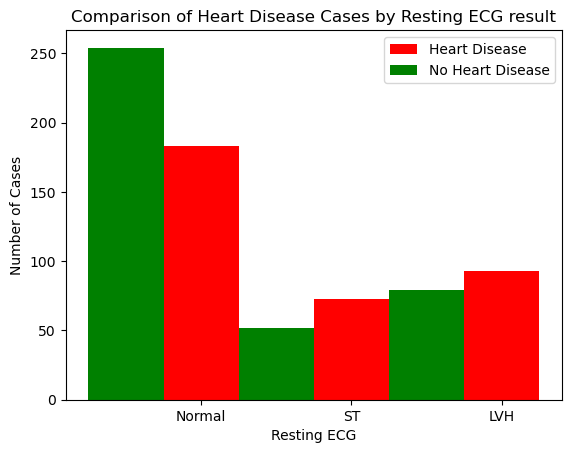

In [21]:
# Explore the relation between HeartDisease and RestingECG.

# Define the RestingECG results. 
recg_results=['Normal', 'ST', 'LVH']

# Variable assignments.
heart_disease_recg = df[df['HeartDisease'] == 1]['RestingECG']
no_heart_disease_recg = df[df['HeartDisease'] == 0]['RestingECG']

# Set the number of categories and the width of each bar.
bar_width = 0.5

# Set the x-axis positions for the bars.
heart_disease_recg_positions = range(len(recg_results))
no_heart_disease_recg_positions = [x - bar_width for x in heart_disease_recg_positions]

# Set the heights of the bars.
heart_disease_recg_heights = [len(heart_disease_recg[heart_disease_recg == recg_result]) for recg_result in recg_results]
no_heart_disease_recg_heights = [len(no_heart_disease_recg[no_heart_disease_recg == recg_result]) for recg_result in recg_results]

# Create the bar plot.
plt.bar(heart_disease_recg_positions, heart_disease_recg_heights, bar_width, label='Heart Disease', color='red')
plt.bar(no_heart_disease_recg_positions, no_heart_disease_recg_heights, bar_width, label='No Heart Disease', color='green')

# Add labels and title to the plot.
plt.gca().set(xlabel='Resting ECG', ylabel='Number of Cases', title='Comparison of Heart Disease Cases by Resting ECG result')

# Add x-axis tick labels based on the desired order.
plt.xticks([x for x in heart_disease_recg_positions], recg_results)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# Despite the clear majority of patients displaying normal ECG results,
# the bar plot shows that patient with a non-normal ECG result are also more likely to have a heart disease.

#### ST_Slope

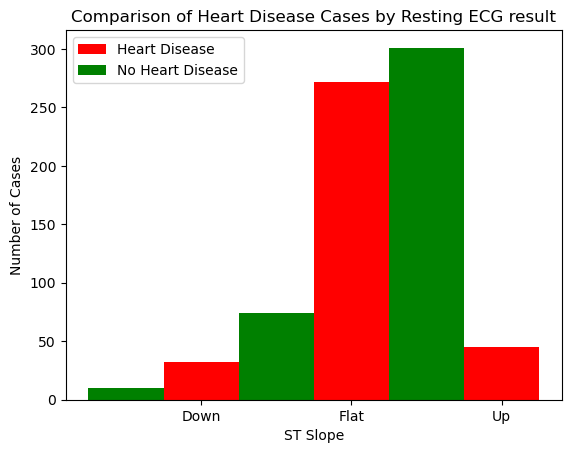

In [22]:
# Explore the relation between HeartDisease and ST_Slope.

#Define the ST_Slope test results.
sts_results=['Down', 'Flat', 'Up']

# Filter the dataframe for heart disease cases and non-heart disease cases for the resting ECG results.
heart_disease_sts = df[df['HeartDisease'] == 1]['ST_Slope']
no_heart_disease_sts = df[df['HeartDisease'] == 0]['ST_Slope']

# Set the number of categories and the width of each bar.
bar_width = 0.5

# Set the x-axis positions for the bars.
heart_disease_sts_positions = range(len(sts_results))
no_heart_disease_sts_positions = [x - bar_width for x in heart_disease_sts_positions]

# Set the heights of the bars.
heart_disease_sts_heights = [len(heart_disease_sts[heart_disease_sts == sts_result]) for sts_result in sts_results]
no_heart_disease_sts_heights = [len(no_heart_disease_sts[no_heart_disease_sts == sts_result]) for sts_result in sts_results]

# Create the bar plot.
plt.bar(heart_disease_sts_positions, heart_disease_sts_heights, bar_width, label='Heart Disease', color='red')
plt.bar(no_heart_disease_sts_positions, no_heart_disease_sts_heights, bar_width, label='No Heart Disease', color='green')

# Add labels and title to the plot.
plt.gca().set(xlabel='ST Slope', ylabel='Number of Cases', title='Comparison of Heart Disease Cases by Resting ECG result')

# Add x-axis tick labels based on the desired order.
plt.xticks([x for x in heart_disease_sts_positions], sts_results)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# The graph shows that the overwhelming majority of patient who display a flat slope of the peak exercise 
# ST segment present a heart disease. On the other hand, upsloping patients are much
# less likely to have a heart disease.

#### BodyWeightCategory

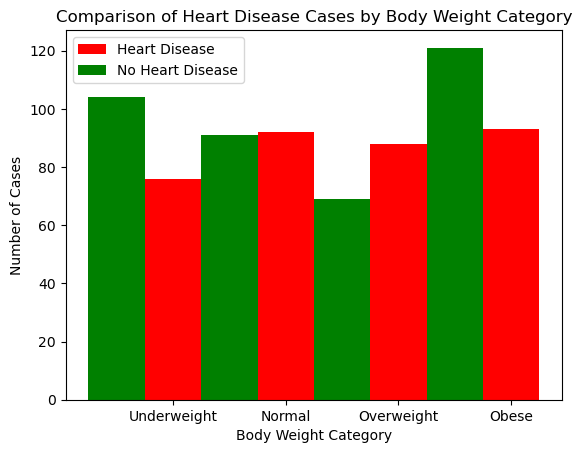

In [23]:
# Explore the relation between HeartDisease and BodyWeightCategory.

# Define the desired order of categories
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Filter the dataframe for heart disease cases and non-heart disease cases for different body weight categories.
heart_disease = df[df['HeartDisease'] == 1]['BodyWeightCategory']
no_heart_disease = df[df['HeartDisease'] == 0]['BodyWeightCategory']

# Set the number of categories and the width of each bar.
bar_width = 0.5

# Set the x-axis positions for the bars based on the desired order.
heart_disease_positions = range(len(categories))
no_heart_disease_positions = [x - bar_width for x in heart_disease_positions]

# Set the heights of the bars.
heart_disease_heights = [len(heart_disease[heart_disease == category]) for category in categories]
no_heart_disease_heights = [len(no_heart_disease[no_heart_disease == category]) for category in categories]

# Create the bar plot.
plt.bar(heart_disease_positions, heart_disease_heights, bar_width, label='Heart Disease', color='red')
plt.bar(no_heart_disease_positions, no_heart_disease_heights, bar_width, label='No Heart Disease', color='green')

# Add labels and title to the plot.
plt.gca().set(xlabel='Body Weight Category', ylabel='Number of Cases', title='Comparison of Heart Disease Cases by Body Weight Category')

# Add x-axis tick labels based on the desired order.
plt.xticks([x for x in heart_disease_positions], categories)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# The relation between BodyWeightCategory and HeartDisease seems rather unexpected.
# The expected outcome would be that people with a higher body weight would be more prone to heart disease.
# However, the histogram shows that weight seems to have no clear effect on heart disease.
# Therefore the BodyWeightCategory column is eligible to be dropped.

In [24]:
# Drop the columns that are not needed.

df = df.drop(columns=['GeneticMarker1'])
df = df.drop(columns=['BodyWeightCategory'])

# Check the dataset after dropping the columns.
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker2,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,11560,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,8575,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,10545,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,10272,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,10368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,12060,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,12920,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,7296,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,13452,1


## Step 4 - Feature Engineering

<sub>

- Encode categorical variables using Dummy Encoding.

</sub>

In [25]:
# Linear encoding.
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)

# Dummy encoding.
df=pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype=int)
# Check out the updated df.
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,GeneticMarker2,HeartDisease,Sex_F,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,141,289,0,173,0,0.0,11560,0,0,...,0,1,0,0,0,1,0,0,0,1
1,49,158,175,0,151,0,1.0,8575,1,1,...,0,0,1,0,0,1,0,0,1,0
2,37,135,285,0,97,0,0.0,10545,0,0,...,0,1,0,0,0,0,1,0,0,1
3,48,140,214,0,112,1,1.5,10272,1,1,...,1,0,0,0,0,1,0,0,1,0
4,54,149,192,0,124,0,0.0,10368,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,106,268,0,135,0,1.2,12060,1,0,...,0,0,0,1,0,1,0,0,1,0
914,68,142,190,1,141,0,3.4,12920,1,0,...,1,0,0,0,0,1,0,0,1,0
915,57,135,128,0,118,1,1.2,7296,1,0,...,1,0,0,0,0,1,0,0,1,0
916,57,128,236,0,172,0,0.0,13452,1,1,...,0,1,0,0,1,0,0,0,1,0


--- End of Fadi's part ---

--- Start of Alessandro's part ---

## Step 5 - Model Training

<sub>

- Import necessary libraries for model training and evaluation.
- Split the dataset into training and testing sets.
- Try different algorithms.
- Evaluate the performance of the models using accuracy.

</sub>

In [26]:
# Import libraries for model training.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Import the necessary library for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# Import necessary libraries for confusion matrix.
from sklearn.metrics import confusion_matrix

# Split the dataset into features (X) and target variable (y).
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tested with a few different test sizes but 0.2 seems to be the best option.

In [27]:
# Create and train a LinearSVC model.
lsvc = LinearSVC(max_iter=1000, dual='auto')
lsvc.fit(X_train, y_train)

# Make predictions on the test set.
lsvc_predictions = lsvc.predict(X_test)

# Evaluate the performance of the model.
lsvc_accuracy = accuracy_score(y_test, lsvc_predictions)
lsvc_precision = precision_score(y_test, lsvc_predictions)
lsvc_recall = recall_score(y_test, lsvc_predictions)
lsvc_f1 = f1_score(y_test, lsvc_predictions)

print(f'LinearSVC Metrics:')
print(f'Accuracy: {lsvc_accuracy}')
print(f'Precision: {lsvc_precision}')
print(f'Recall: {lsvc_recall}')
print(f'F1 Score: {lsvc_f1}')

# LinearSVC Metrics:
# Accuracy: 0.8639455782312925
# Precision: 0.8904109589041096
# Recall: 0.8441558441558441
# F1 Score: 0.8666666666666666

LinearSVC Metrics:
Accuracy: 0.8639455782312925
Precision: 0.8904109589041096
Recall: 0.8441558441558441
F1 Score: 0.8666666666666666


In [28]:
# Create and train a LogisticRegression model.
model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

# Make predictions.
predictions_lr = model_lr.predict(X_test)

# Evaluate the performance of the model.
accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)

print(f'Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')

Logistic Regression Metrics:
Accuracy: 0.8707482993197279
Precision: 0.8918918918918919
Recall: 0.8571428571428571
F1 Score: 0.8741721854304636


In [29]:
# Create and train a DecisionTree model.
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions.
predictions_dt = model_dt.predict(X_test)

# Evaluate the performance of the model.
accuracy_dt = accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt)
recall_dt = recall_score(y_test, predictions_dt)
f1_dt = f1_score(y_test, predictions_dt)

print(f'Decision Tree Metrics:')
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')

Decision Tree Metrics:
Accuracy: 0.8299319727891157
Precision: 0.825
Recall: 0.8571428571428571
F1 Score: 0.8407643312101911


In [30]:
# Create and train a SVC model.
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Make predictions.
predictions_svm = model_svm.predict(X_test)

# Evaluate the performance of the model.
accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm)
f1_svm = f1_score(y_test, predictions_svm)

print(f'SVM Metrics:')
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')

SVM Metrics:
Accuracy: 0.5782312925170068
Precision: 0.6530612244897959
Recall: 0.4155844155844156
F1 Score: 0.5079365079365079


In [31]:
# Define the hyperparameter grid for LinearSVC.
param_grid_lsvc = {
    'penalty': ['l1', 'l2'],
    'dual': ['auto', True, False],
    'max_iter': [1000, 2000, 3000]
}

# Create a Logistic LinearSVC.
model_lsvc = LinearSVC()

# Perform GridSearchCV to find the best hyperparameters.
grid_search_lsvc = GridSearchCV(model_lsvc, param_grid_lsvc, cv=5)
grid_search_lsvc.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV.
print("Best hyperparameters:", grid_search_lsvc.best_params_)

# Evaluate the performance of the best model on the test set.
best_model_lsvc = grid_search_lsvc.best_estimator_
accuracy_best_lsvc = best_model_lsvc.score(X_test, y_test)
print("Accuracy on test set:", accuracy_best_lsvc)

c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best hyperparameters: {'dual': 'auto', 'max_iter': 1000, 'penalty': 'l1'}
Accuracy on test set: 0.8639455782312925


c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 9

In [32]:
# Define the hyperparameter grid for Logistic Regression.
param_grid_lr = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.1, 1, 10],
    'max_iter': [2000, 2500, 3000]
}

# Create a Logistic Regression model.
model_lr = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters.
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV.
print("Best hyperparameters:", grid_search_lr.best_params_)

# Evaluate the performance of the best model on the test set.
best_model_lr = grid_search_lr.best_estimator_
accuracy_best_lr = best_model_lr.score(X_test, y_test)
print("Accuracy on test set:", accuracy_best_lr)

c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Best hyperparameters: {'C': 0.1, 'max_iter': 2000, 'solver': 'newton-cg'}
Accuracy on test set: 0.8707482993197279


c:\Users\tjabb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tjabb\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [33]:
# Define the hyperparameter grid for Decision Tree.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20]
}

# Create a Decision Tree model.
model_dt = DecisionTreeClassifier()

# Perform GridSearchCV to find the best hyperparameters.
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV.
print("Best hyperparameters:", grid_search_dt.best_params_)

# Evaluate the performance of the best model on the test set.
best_model_dt = grid_search_dt.best_estimator_
accuracy_best_dt = best_model_dt.score(X_test, y_test)
print("Accuracy on test set:", accuracy_best_dt)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Accuracy on test set: 0.8367346938775511


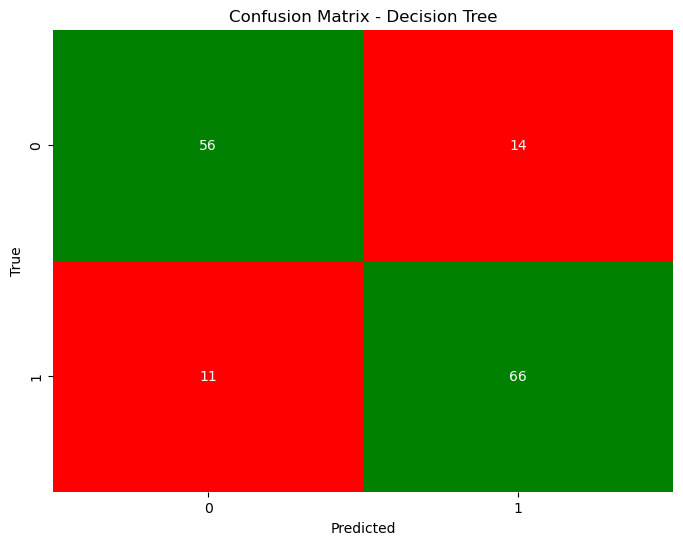

In [34]:
# Create a confusion matrix for Decision Tree.
cm_dt = confusion_matrix(y_test, predictions_dt)

# Display the confusion matrix for Decision Tree.
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap=['red', 'green'], cbar=False)

# Add labels and title to the plot.
plt.gca().set(xlabel='Predicted', ylabel='True', title='Confusion Matrix - Decision Tree')

# Show the plot.
plt.show()

--- End of Alessandro's part ---